##### Loading Header Files

In [64]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import torch.onnx

%matplotlib inline

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Function to Create a List to store all the Filenames
### under each folder

In [66]:
def file_search(dirname, ret, audio_file, list_avoid_dir=[]):
    filenames = os.listdir(dirname)

    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        audio_name = filename

        if os.path.isdir(full_filename) :
            if full_filename.split('/')[-1] in list_avoid_dir:
                continue
            else:
                file_search(full_filename, ret, list_avoid_dir)

        else:
            ret.append( full_filename )
            audio_file.append(audio_name)

In [67]:
list_files = []

##storing only the names of the audio file
audio_file = []
for x in range(24):

    ##converting the iteration to string
    check_iter = str(x)

    if x == 9:
      sess_name = 'Actor_' + str(x+1)
    elif len(check_iter) == 1:
        sess_name = 'Actor_0' + str(x+1)
    else:
        sess_name = 'Actor_' + str(x+1)
    path = '/content/drive/MyDrive/9444_Group_Project-20231106T022709Z-001/9444_Group_Project/archive/'+ sess_name + '/'
    file_search(path, list_files, audio_file)
    list_files = sorted(list_files)
    print (sess_name + ", #sum files: " + str(len(list_files)))

Actor_01, #sum files: 60
Actor_02, #sum files: 120
Actor_03, #sum files: 180
Actor_04, #sum files: 240
Actor_05, #sum files: 300
Actor_06, #sum files: 360
Actor_07, #sum files: 420
Actor_08, #sum files: 480
Actor_09, #sum files: 540
Actor_10, #sum files: 600
Actor_11, #sum files: 660
Actor_12, #sum files: 720
Actor_13, #sum files: 780
Actor_14, #sum files: 840
Actor_15, #sum files: 900
Actor_16, #sum files: 960
Actor_17, #sum files: 1020
Actor_18, #sum files: 1080
Actor_19, #sum files: 1140
Actor_20, #sum files: 1200
Actor_21, #sum files: 1260
Actor_22, #sum files: 1320
Actor_23, #sum files: 1380
Actor_24, #sum files: 1440


In [68]:
len(list_files)###total number of files in the directory

1440

In [69]:
emotion_class = []
for everyfile in list_files:
  if (everyfile.split('/')[-1].strip('.wav')):
    ##getting the actual audio file name
    filename = everyfile.split('/')[-1].strip('.wav')

    audio_file = filename.split('-')

    ##getting the emotion class
    label = audio_file[2]

    ##making the class labels as either '0', '1', '2', '3', '4', '5', '6', '7'
    number_label = int(label) - 1

    emotion_class.append(number_label)

In [70]:
emotion_class###printing of the 'emotion_class' labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [71]:
data = []

for filenames, labels in zip(list_files, emotion_class):
  data.append({"path": filenames, "emotion_id": labels})

In [72]:
import pandas as pd

final_dataframe = pd.DataFrame(data)

In [73]:
final_dataframe

,path,emotion_id
0,/content/drive/MyDrive/9444_Group_Project-2023...,0
1,/content/drive/MyDrive/9444_Group_Project-2023...,0
2,/content/drive/MyDrive/9444_Group_Project-2023...,0
3,/content/drive/MyDrive/9444_Group_Project-2023...,0
4,/content/drive/MyDrive/9444_Group_Project-2023...,1
...,...,...
1435,/content/drive/MyDrive/9444_Group_Project-2023...,7
1436,/content/drive/MyDrive/9444_Group_Project-2023...,7
1437,/content/drive/MyDrive/9444_Group_Project-2023...,7
1438,/content/drive/MyDrive/9444_Group_Project-2023...,7


In [74]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

In [75]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)



  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

  ##same sample rates for each audio signal
  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  ##resizing signals to the same length
  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)

  ###performing data augmentation by time shifting of audio signals
  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

In [76]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

In [77]:
# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4

  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)

  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.df.loc[idx, 'path']
    # Get the Class ID/ Emotion ID
    class_id = self.df.loc[idx, 'emotion_id']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    #aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return sgram, class_id

In [78]:
from torch.utils.data import random_split

myds = SoundDS(final_dataframe, list_files)

In [79]:
len(myds)

1440

In [80]:
num_items = len(myds)

##Number of items in the Training Dataset
num_train = round(num_items * 0.8)

##Number of items in the Validation Dataset
num_val = num_items - num_train

##randomly splitting the data between training and valaidation dataset
train_ds, val_ds = random_split(myds, [num_train, num_val])

In [81]:
# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=8, shuffle=False)

In [82]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

### Taking the MultiHead Attention from 'https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html'

#### Function to Scaled Dot Product between 'Q','K' and 'V' matrices

In [83]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    attn_logits = torch.matmul(q, k.transpose(-2, -1))
    attn_logits = attn_logits / math.sqrt(d_k)
    if mask is not None:
        attn_logits = attn_logits.masked_fill(mask == 0, -9e15)
    attention = F.softmax(attn_logits, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [84]:
# Helper function to support different mask shapes.
# Output shape supports (batch_size, number of heads, seq length, seq length)
# If 2D: broadcasted over batch size and number of heads
# If 3D: broadcasted over number of heads
# If 4D: leave as is
def expand_mask(mask):
    assert mask.ndim > 2, "Mask must be at least 2-dimensional with seq_length x seq_length"
    if mask.ndim == 3:
        mask = mask.unsqueeze(1)
    while mask.ndim < 4:
        mask = mask.unsqueeze(0)
    return mask

##### Function to Implement MultiHead Attention

In [85]:
class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be 0 modulo number of heads."

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Stack all weight matrices 1...h together for efficiency
        # Note that in many implementations you see "bias=False" which is optional
        self.qkv_proj = nn.Linear(input_dim, 3*embed_dim)
        self.o_proj = nn.Linear(embed_dim, embed_dim)

        self._reset_parameters()

    def _reset_parameters(self):
        # Original Transformer initialization, see PyTorch documentation
        nn.init.xavier_uniform_(self.qkv_proj.weight)
        self.qkv_proj.bias.data.fill_(0)
        nn.init.xavier_uniform_(self.o_proj.weight)
        self.o_proj.bias.data.fill_(0)

    def forward(self, x, mask=None, return_attention=False):
        batch_size, seq_length, _ = x.size()
        if mask is not None:
            mask = expand_mask(mask)
        qkv = self.qkv_proj(x)

        # Separate Q, K, V from linear output
        qkv = qkv.reshape(batch_size, seq_length, self.num_heads, 3*self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3) # [Batch, Head, SeqLen, Dims]
        q, k, v = qkv.chunk(3, dim=-1)

        # Determine value outputs
        values, attention = scaled_dot_product(q, k, v, mask=mask)
        values = values.permute(0, 2, 1, 3) # [Batch, SeqLen, Head, Dims]
        values = values.reshape(batch_size, seq_length, self.embed_dim)
        #print(len(values))
        o = self.o_proj(values)

        ##returning the attention map
        return o

In [86]:
def xavier_init(model):
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
          if "conv" in name.lower():
            bound = math.sqrt(6)/math.sqrt(param.shape[0]+param.shape[1])
            param.data.uniform_(-bound, bound)

In [87]:
import torch.nn.functional as F
from torch.nn import init

class AlexNet(nn.Module):
    def __init__(self,num_classes: int = 8, dropout: float = 0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(2, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.attention = MultiheadAttention(input_dim = 256, embed_dim= 256, num_heads=16)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )



    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=2)
        context_first = self.attention(x.permute(0,2,1))
        context_second = self.attention(context_first)
        feature_map = context_second
        output_value = self.classifier(context_second.squeeze(1))



        return output_value, feature_map

# Create the model and put it on the GPU if available
myModel = AlexNet()
xavier_init(myModel)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cuda', index=0)

#### Saving the model at the time having with best weights having lowest value in loss function

In [88]:
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename))


In [89]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  flag = 0
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,anneal_strategy='linear')
  early_stop_thresh = 10
  best_accuracy = -1
  best_epoch = -1
  map_list = []
  labels_collection_map = []
  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set

    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        #print(data)
        #inputs, labels = data[0], torch.tensor(data[1])

        inputs = data[0].to(device)
        labels = data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs, atten_map = model(inputs)

        #print(outputs[0])
        #print(len(outputs[0]))

        #print(outputs[0][0])
        #print(len(outputs[0][0]))

        final_output = torch.empty(0, 8, device=outputs.device)

        for i in range(len(outputs)):
          current_output = outputs[i][0]

          # Ensure that the current tensor is on the same device as final_output
          current_output = current_output.to(device=final_output.device)

          # Add an extra dimension to current_output for concatenation
          current_output = current_output.unsqueeze(0)

          # Concatenate the current tensor to the final_output tensor along dimension 0
          final_output = torch.cat((final_output, current_output), dim=0)


        #print(final_output)
        #print(len(final_output))

        reshaped_tensor = final_output.view(8, 8)
        #print(reshaped_tensor)
        #print(len(reshaped_tensor))

        #print(reshaped_tensor[0])
        #print(len(reshaped_tensor[0]))



        # Flatten the tensor to a 1D tensor
        #lattened_tensor = outputs[0].flatten()

        # Count the number of tensors in the flattened tensor
        #num_tensors = sum(1 for element in flattened_tensor if torch.is_tensor(element))

        #print("Number of tensors:", num_tensors)

        #print(outputs)

        #print(len(labels))

        #labels_tens = torch.tensor(labels)

        #print(labels_tens)
        #print(len(outputs[0]))

        #outputs_single = outputs[0].view(891, 8)

        #print(len(outputs_single))
        loss = criterion(reshaped_tensor, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(reshaped_tensor,1)

        #print(prediction)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))

        ##appending the attention maps of the last iteration
        if epoch - best_epoch > early_stop_thresh:
            map_list.append(atten_map)
            labels_collection_map.append(labels)



    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')


    if acc > best_accuracy:
      best_accuracy = acc
      best_epoch = epoch
      checkpoint(myModel, 'best_model_Alex_multi_attn.pth')
    elif epoch - best_epoch > early_stop_thresh:
      print(f'Stopping early at epoch {epoch}')
      flag = 1
      #print(map_list)
      break
    else:
      checkpoint(myModel, 'last_model_Alex_multi_attn.pth')

  if flag == 1:
      return map_list, labels_collection_map


num_epochs=150  # Just for demo, adjust this higher.
atten_map, labels_tens = training(myModel, train_dl, num_epochs)
#resume(myModel, 'best_model_Alex_multi_attn.pth')

Epoch: 0, Loss: 2.04, Accuracy: 0.15
Epoch: 1, Loss: 1.92, Accuracy: 0.20
Epoch: 2, Loss: 1.89, Accuracy: 0.23
Epoch: 3, Loss: 1.89, Accuracy: 0.24
Epoch: 4, Loss: 1.90, Accuracy: 0.21
Epoch: 5, Loss: 1.85, Accuracy: 0.23
Epoch: 6, Loss: 1.88, Accuracy: 0.24
Epoch: 7, Loss: 1.86, Accuracy: 0.27
Epoch: 8, Loss: 1.83, Accuracy: 0.24
Epoch: 9, Loss: 1.82, Accuracy: 0.29
Epoch: 10, Loss: 1.79, Accuracy: 0.26
Epoch: 11, Loss: 1.78, Accuracy: 0.27
Epoch: 12, Loss: 1.74, Accuracy: 0.29
Epoch: 13, Loss: 1.72, Accuracy: 0.30
Epoch: 14, Loss: 1.72, Accuracy: 0.30
Epoch: 15, Loss: 1.72, Accuracy: 0.30
Epoch: 16, Loss: 1.71, Accuracy: 0.30
Epoch: 17, Loss: 1.74, Accuracy: 0.30
Epoch: 18, Loss: 1.68, Accuracy: 0.31
Epoch: 19, Loss: 1.65, Accuracy: 0.33
Epoch: 20, Loss: 1.62, Accuracy: 0.35
Epoch: 21, Loss: 1.60, Accuracy: 0.36
Epoch: 22, Loss: 1.65, Accuracy: 0.34
Epoch: 23, Loss: 1.60, Accuracy: 0.36
Epoch: 24, Loss: 1.67, Accuracy: 0.35
Epoch: 25, Loss: 1.58, Accuracy: 0.35
Epoch: 26, Loss: 1.53,

TypeError: ignored

In [90]:
atten_map

[tensor([[[ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          ...,
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871],
          [ -51.6853,  113.4210, -103.6670,  ...,   -9.0064,    0.4140,
             61.4871]],
 
         [[-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          [-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          [-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          ...,
          [-103.9388,   55.4982,  -62.7685,  ...,    1.9021,  -19.1840,
             49.6914],
          [-103.9

In [91]:
atten_map[-1]

tensor([[[   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         ...,
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995],
         [   3.0355, -133.6756,  -24.3323,  ...,  -74.2522,  103.7675,
           150.2995]],

        [[  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         [  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         [  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         ...,
         [  -9.5157, -151.4320,   -3.6382,  ...,  -65.3938,   76.6569,
           144.7567],
         [  -9.5157, -151.4320,   -3.638

In [92]:
len(atten_map[-1][0])

9

In [93]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs, atten_map = model(inputs)

      validation_output = torch.empty(0, 8, device=outputs.device)

      for i in range(len(outputs)):
        current_output = outputs[i][0]

        # Ensure that the current tensor is on the same device as final_output
        current_output = current_output.to(device=validation_output.device)

        # Add an extra dimension to current_output for concatenation
        current_output = current_output.unsqueeze(0)

        # Concatenate the current tensor to the final_output tensor along dimension 0
        validation_output = torch.cat((validation_output, current_output), dim=0)


        #print(final_output)
        #print(len(final_output))

        #reshaped_tensor = validation_output.view(16, 8)
        #print(validation_output)








      # Get the predicted class with the highest score
      _, prediction = torch.max(validation_output,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

In [94]:
# Run inference on trained model with the validation set
inference(myModel, val_dl)

Accuracy: 0.69, Total items: 288


In [95]:
labels_tens[-1]

tensor([1, 7, 2, 6, 1, 4, 7, 4], device='cuda:0')

In [96]:
emotion_names = []
for label in labels_tens[-1]:
    if label == 1:
        emotion_names.append('neutral')
    elif label == 2:
        emotion_names.append('calm')
    elif label == 3:
        emotion_names .append('happy')
    elif label == 4:
        emotion_names.append('sad')
    elif label == 5:
        emotion_names.append('angry')
    elif label == 6:
        emotion_names.append('fearful')
    else:
        emotion_names.append('disgust')


In [97]:
emotion_names

['neutral', 'disgust', 'calm', 'fearful', 'neutral', 'sad', 'disgust', 'sad']

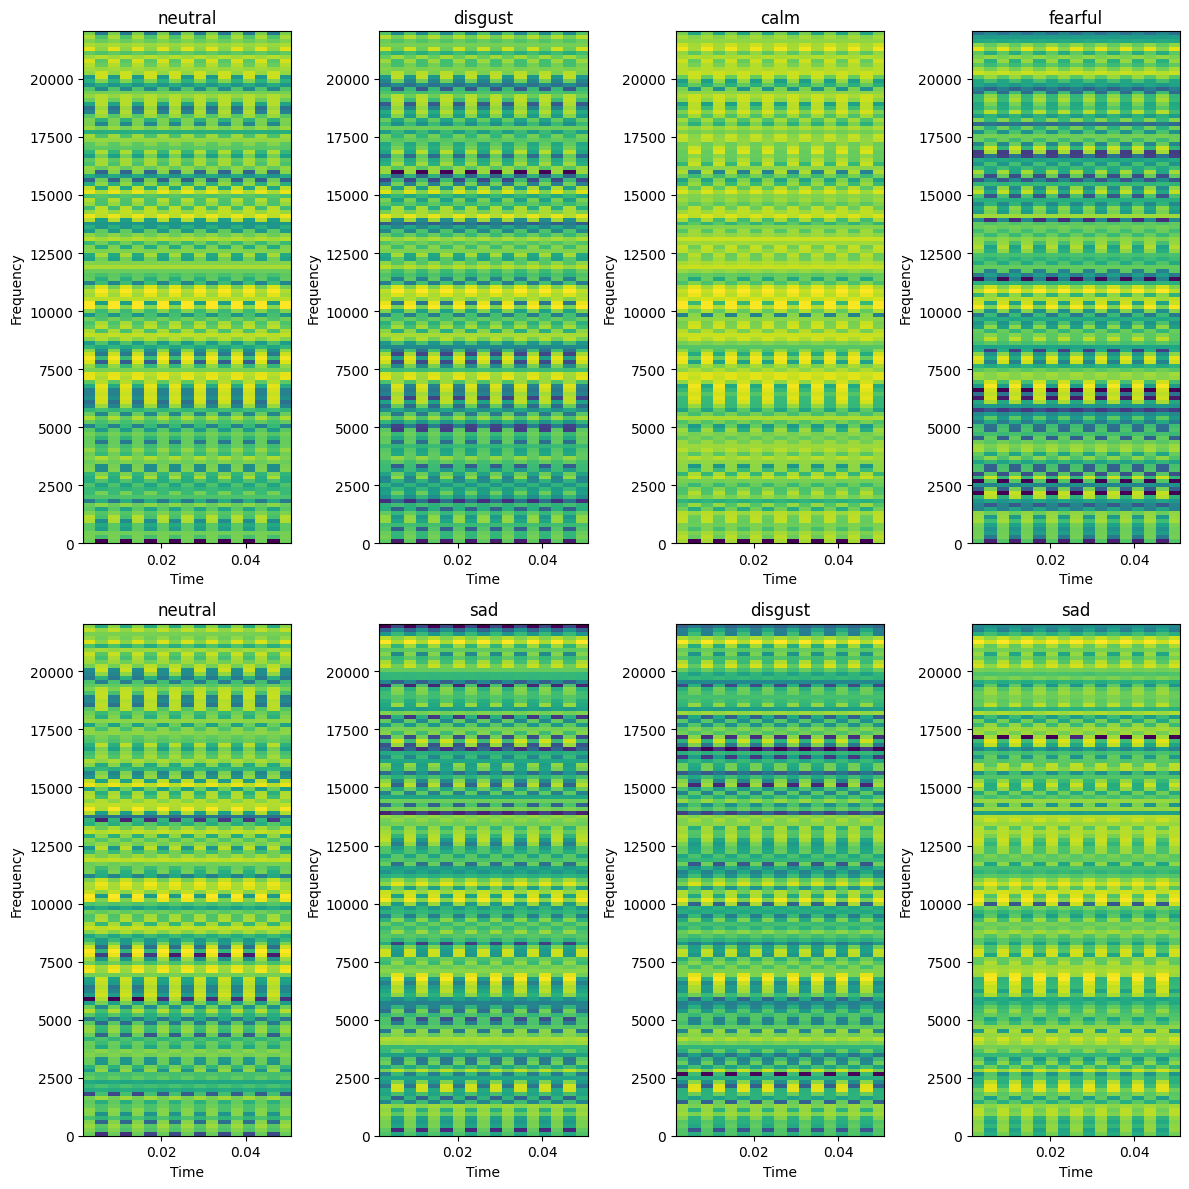

In [98]:
import matplotlib.pyplot as plt
import torch

# Assuming you have a list of 16 tensors
# Replace this with your actual list of tensors
tensor_list = atten_map[-1]

# Create a 4x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 12))

# Iterate through the tensors and plot them in subplots
for i, tensor_data in enumerate(tensor_list):
    # Convert the tensor to a numpy array
    data_array = tensor_data.cpu().detach().numpy()

    # Calculate the row and column indices for the subplot grid
    row_index = i // 4
    col_index = i % 4

    # Plot the spectrogram in the current subplot
    axes[row_index, col_index].specgram(data_array.flatten(), Fs=44100)  # Adjust Fs accordingly
    axes[row_index, col_index].set_title(emotion_names[i])
    axes[row_index, col_index].set_xlabel('Time')
    axes[row_index, col_index].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

### Obtaining the Confusion Matrix on the Performance of Alexnet+Multihead model on validation Dataset

<Axes: title={'center': 'Alexnet+Multihead_Atten'}>

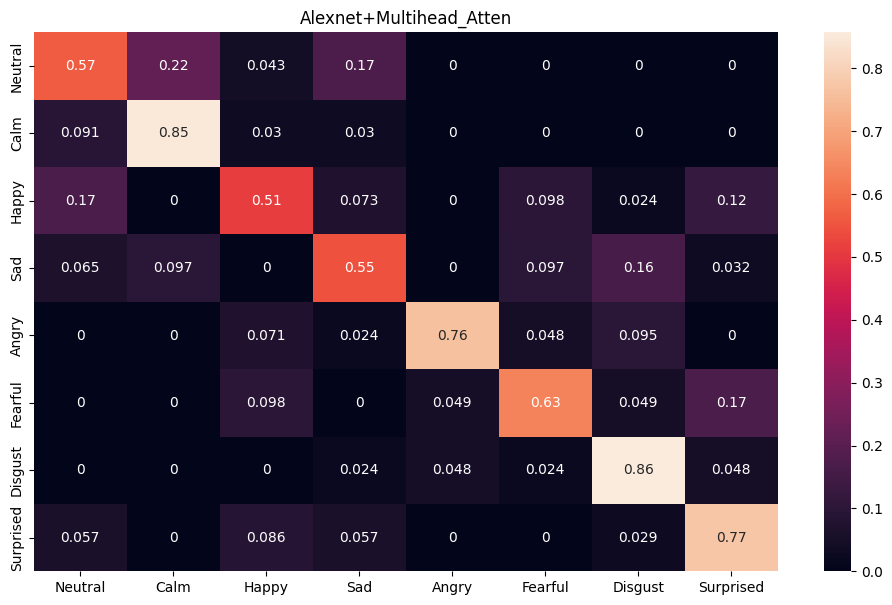

In [105]:
y_pred = []
y_true = []

for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs, atten_map = myModel(inputs)

      validation_output = torch.empty(0, 8, device=outputs.device)

      for i in range(len(outputs)):
        current_output = outputs[i][0]

        # Ensure that the current tensor is on the same device as final_output
        current_output = current_output.to(device=validation_output.device)

        # Add an extra dimension to current_output for concatenation
        current_output = current_output.unsqueeze(0)

        # Concatenate the current tensor to the final_output tensor along dimension 0
        validation_output = torch.cat((validation_output, current_output), dim=0)

      _, prediction = torch.max(validation_output,1)
      final_output = prediction.data.cpu().numpy()
      y_pred.extend(final_output) # Save Prediction

      labels = labels.data.cpu().numpy()
      y_true.extend(labels) # Save Truth


























# iterate over test data
#for data in val_dl:
        #inputs, labels = data[0].to(device), data[1].to(device)
        #output = new_Model(inputs) # Feed Network

        #output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        #y_pred.extend(output) # Save Prediction

        #labels = labels.data.cpu().numpy()
        #y_true.extend(labels) # Save Truth

# constant for classes
classes = ('Neutral', 'Calm', 'Happy', 'Sad', 'Angry',
        'Fearful', 'Disgust', 'Surprised')

#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title('Alexnet+Multihead_Atten')
sn.heatmap(df_cm, annot=True)